#### Importing Libraries

In [35]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#### Importing Data

In [36]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Data Preprocessing

In [37]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot: >

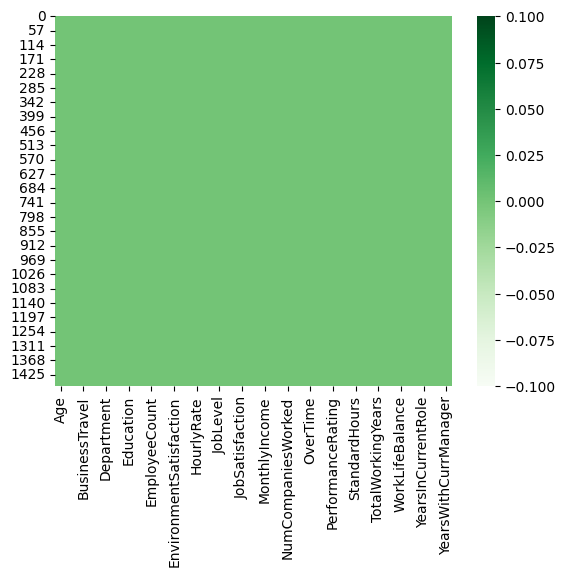

In [38]:
sns.heatmap(df.isnull(), cmap='Greens')

In [39]:
object_col = df.select_dtypes(include='object').columns

for col in object_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


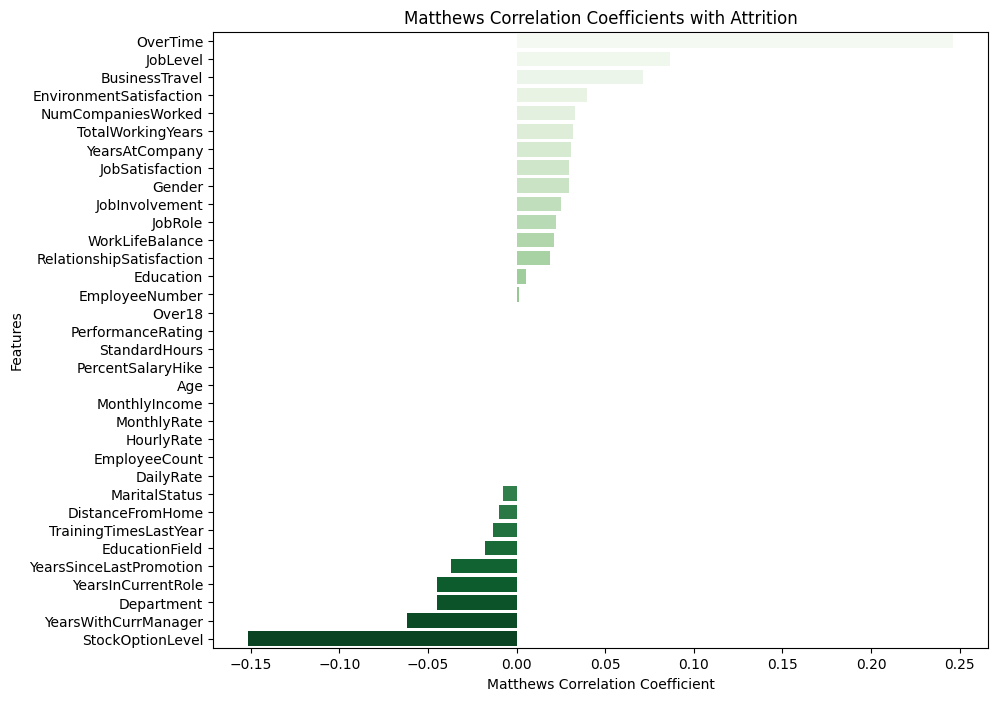

In [41]:
# Calculate Matthews correlation coefficient for each feature
mcc_scores = {}
for col in df.columns:
    if col != 'Attrition':
        mcc = matthews_corrcoef(df['Attrition'], df[col])
        mcc_scores[col] = mcc

# Create a DataFrame to hold the Matthews correlation coefficients
mcc_df = pd.DataFrame(mcc_scores.values(), index=mcc_scores.keys(), columns=['Matthews Correlation Coefficient'])

# Sort the DataFrame by MCC values
mcc_df = mcc_df.sort_values(by='Matthews Correlation Coefficient', ascending=False)

# Create a bar plot to visualize the Matthews correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=mcc_df['Matthews Correlation Coefficient'], y=mcc_df.index, palette='Greens')
plt.xlabel('Matthews Correlation Coefficient')
plt.ylabel('Features')
plt.title('Matthews Correlation Coefficients with Attrition')
plt.show()

In [42]:
X = df.drop(['Attrition', 'Over18',  'PerformanceRating', 
             'StandardHours', 'PercentSalaryHike', 'Age', 
             'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 
             'EmployeeCount', 'DailyRate', 'EmployeeNumber'] , axis='columns')

y = df['Attrition']

print(X.columns)
print(X.shape)

Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
(1470, 23)


In [43]:
X.head()

,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,1,2,1,2,0,3,2,7,...,1,1,0,8,0,1,6,4,0,5
1,1,1,8,1,1,3,1,2,2,6,...,0,4,1,10,3,3,10,7,1,7
2,2,1,2,2,4,4,1,2,1,2,...,1,2,0,7,3,3,0,0,0,0
3,1,1,3,4,1,4,0,3,1,6,...,1,3,0,8,3,3,8,7,3,0
4,2,1,2,1,3,1,1,3,1,2,...,0,4,1,6,3,3,2,2,2,2


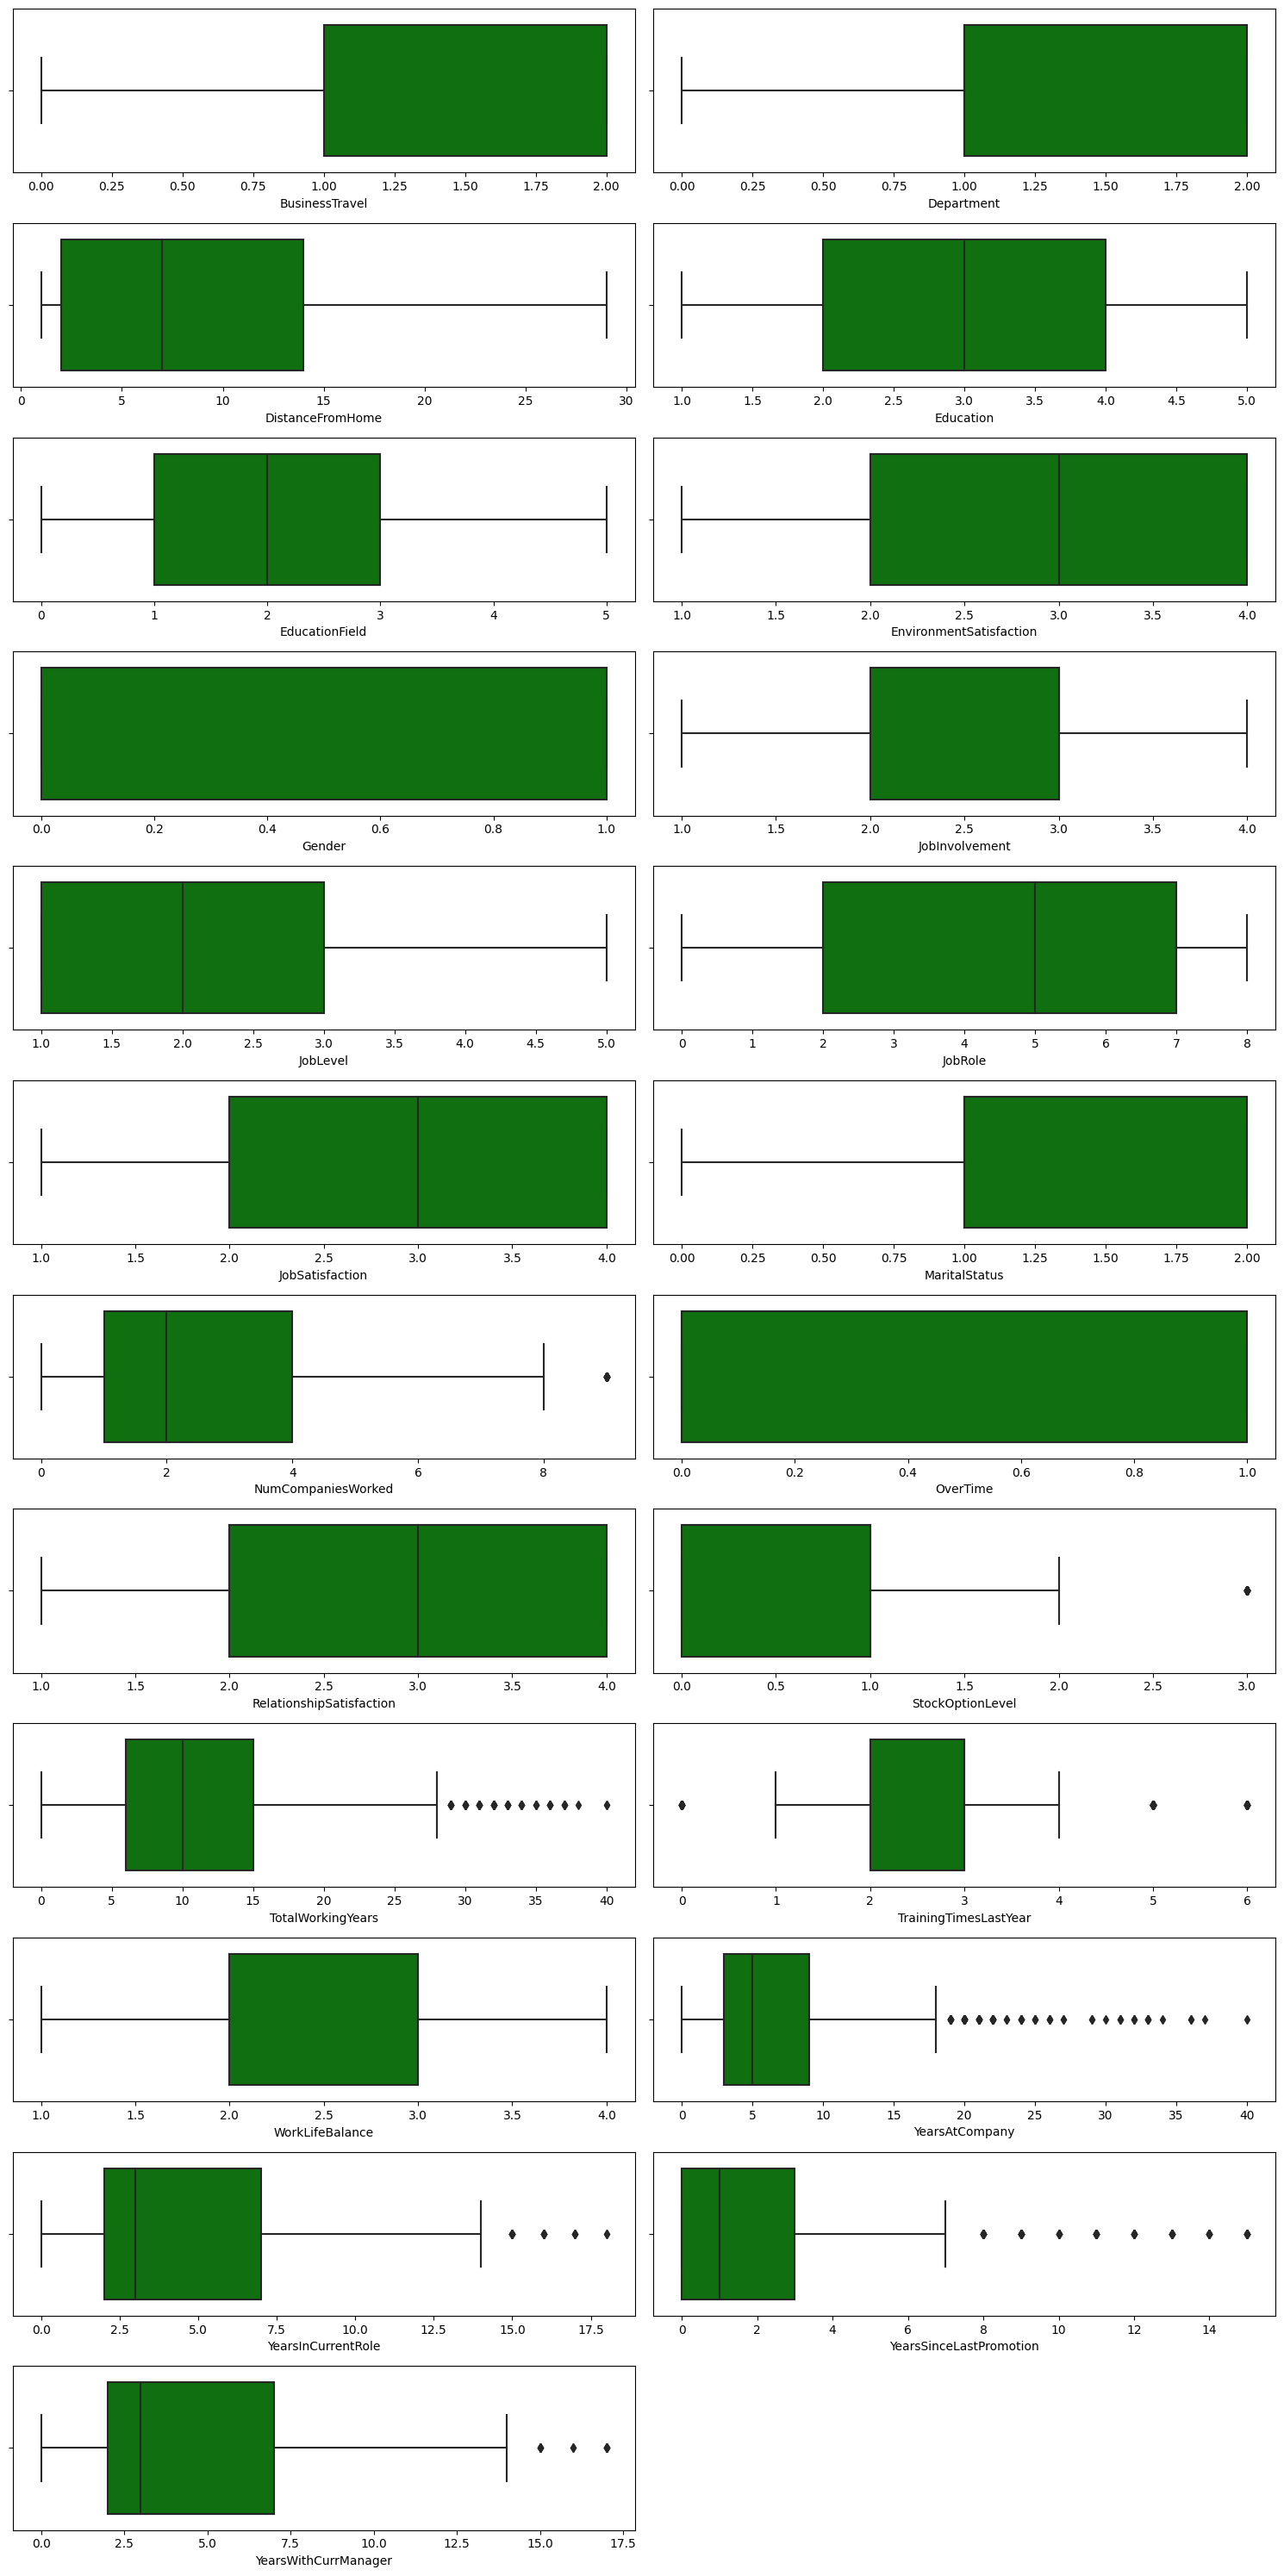

In [44]:
# Checking the outliers
# Calculating the number of rows and columns for the subplot grid
n_rows = (len(X.columns) + 1) // 2
n_cols = 2

# Create subplots with specified number of rows and columns
# Set the figure size to (15, 20)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column in the DataFrame
for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i], color="green")

# Remove any extra empty subplots
for j in range(len(X.columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [45]:
# Calculate the first quartile (Q1)
Q1 = X.quantile(.25)

# Calculate the third quartile (Q3)
Q3 = X.quantile(.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits for outlier detection
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip the values in the DataFrame to the calculated lower and upper limits to handle outliers
X = X.clip(lower=lower_limit, upper=upper_limit, axis=1)

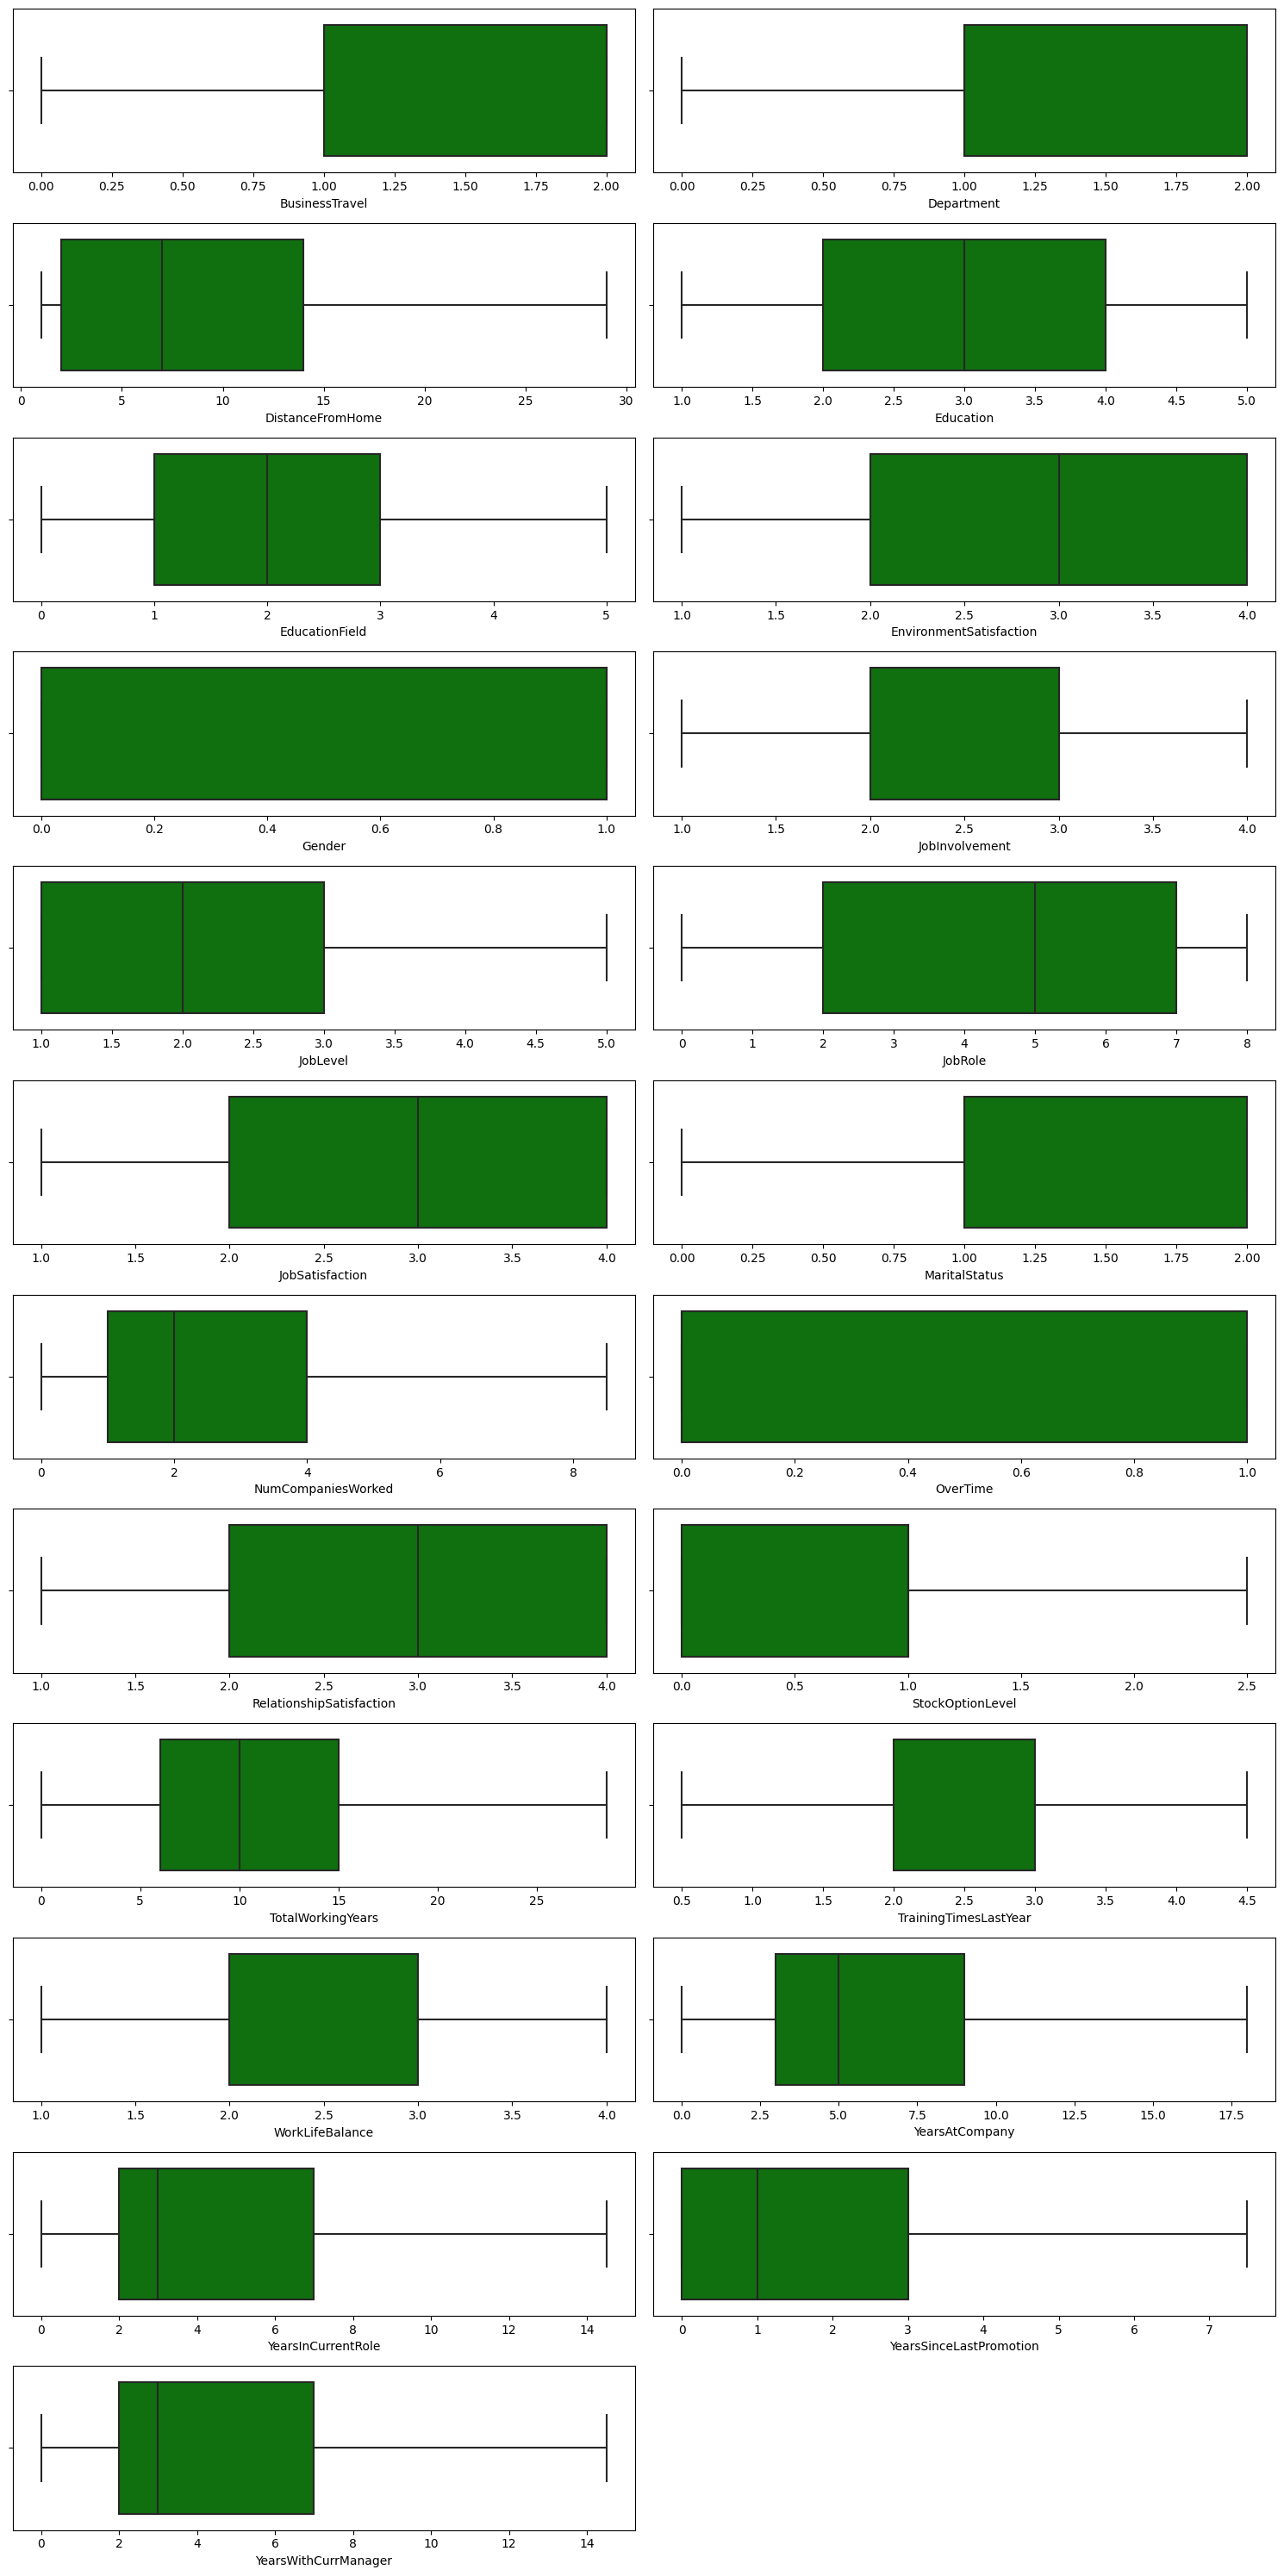

In [46]:
# Checking the outliers
# Calculating the number of rows and columns for the subplot grid
n_rows = (len(X.columns) + 1) // 2
n_cols = 2

# Create subplots with specified number of rows and columns
# Set the figure size to (15, 20)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column in the DataFrame
for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i], color="green")

# Remove any extra empty subplots
for j in range(len(X.columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


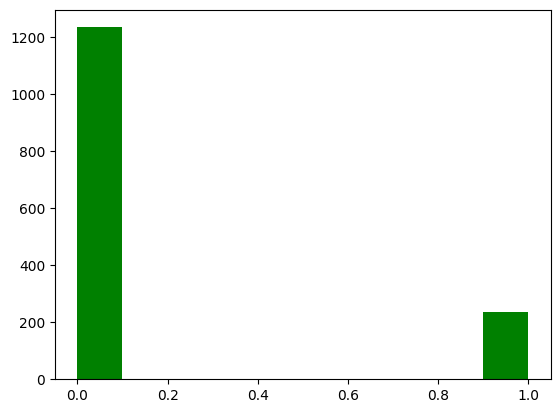

In [47]:
y.hist(grid=False, color='green')
y = LabelEncoder().fit_transform(y)

In [48]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1972, 23), (494, 23), (1972,), (494,))

In [51]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [52]:
def run_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """
    Function to train, evaluate, and visualize the performance of a given model.
    
    Parameters:
    model: The machine learning model to be trained and evaluated.
    X_train, y_train: The training features and target variable.
    X_test, y_test: The testing features and target variable.
    
    Returns:
    train_accuracy: Accuracy of the model on the training set.
    test_accuracy: Accuracy of the model on the testing set.
    roc_auc: ROC Area Under Curve score.
    time_taken: Time taken to train the model.
    """
    
    # Record the start time
    t0 = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Calculate the time taken
    time_taken = (time.time() - t0)
    
    # Print the evaluation metrics
    print("Train Accuracy = {}".format(train_accuracy))
    print("Test Accuracy = {}".format(test_accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    # Calculate and plot ROC curve
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]
    
    # Plot the confusion matrix
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, fmt='d', cmap="Greens")
    
    # Return the trained model and evaluation metrics
    return train_accuracy, test_accuracy, roc_auc, time_taken

Train Accuracy = 0.7606490872210954
Test Accuracy = 0.7935222672064778
ROC Area under Curve = 0.792365605600317
Time taken = 0.024000883102416992
              precision    recall  f1-score   support

           0    0.77193   0.77876   0.77533       226
           1    0.81203   0.80597   0.80899       268

    accuracy                        0.79352       494
   macro avg    0.79198   0.79237   0.79216       494
weighted avg    0.79368   0.79352   0.79359       494



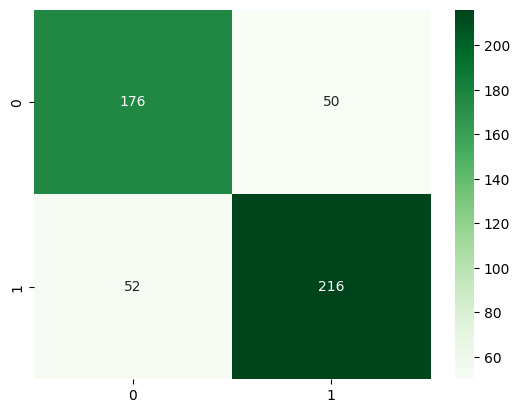

In [53]:
from sklearn.linear_model import LogisticRegression
# Initializing Logistic Regression model
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Run the model and store the results
train_accuracy_lr, test_accuracy_lr, roc_auc_lr, tt_lr = run_model(lr)

Train Accuracy = 0.7545638945233266
Test Accuracy = 0.7894736842105263
ROC Area under Curve = 0.788634262316735
Time taken = 0.009508609771728516
              precision    recall  f1-score   support

           0    0.76522   0.77876   0.77193       226
           1    0.81061   0.79851   0.80451       268

    accuracy                        0.78947       494
   macro avg    0.78791   0.78863   0.78822       494
weighted avg    0.78984   0.78947   0.78961       494



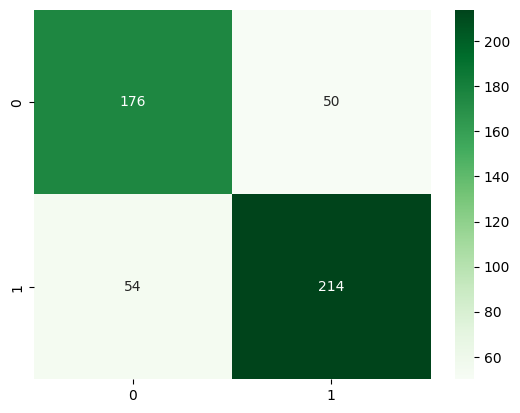

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initializing Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

# Run the model and store the results
train_accuracy_lda, test_accuracy_lda, roc_auc_lda, tt_lda = run_model(lda)

Train Accuracy = 0.7941176470588235
Test Accuracy = 0.8016194331983806
ROC Area under Curve = 0.8032954695548804
Time taken = 0.1020059585571289
              precision    recall  f1-score   support

           0    0.76230   0.82301   0.79149       226
           1    0.84000   0.78358   0.81081       268

    accuracy                        0.80162       494
   macro avg    0.80115   0.80330   0.80115       494
weighted avg    0.80445   0.80162   0.80197       494



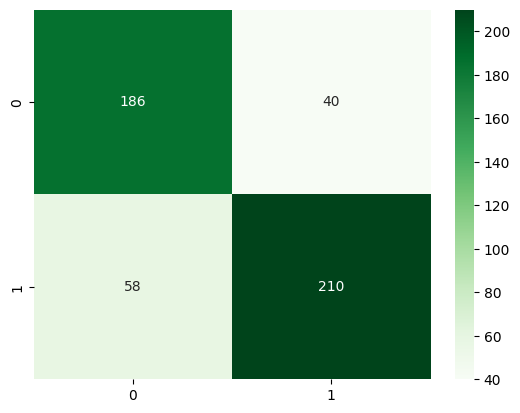

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing K-Nearest Neighbors (KNN) classifier with 20 neighbors
knn = KNeighborsClassifier(n_neighbors=20)

# Run the model with scaled data and store the results
train_accuracy_knn, test_accuracy_knn, roc_auc_knn, tt_knn = run_model(knn, X_train=X_train_s, X_test=X_test_s)

Train Accuracy = 0.7469574036511156
Test Accuracy = 0.7327935222672065
ROC Area under Curve = 0.7239136177519483
Time taken = 0.004322052001953125
              precision    recall  f1-score   support

           0    0.75269   0.61947   0.67961       226
           1    0.72078   0.82836   0.77083       268

    accuracy                        0.73279       494
   macro avg    0.73673   0.72391   0.72522       494
weighted avg    0.73538   0.73279   0.72910       494



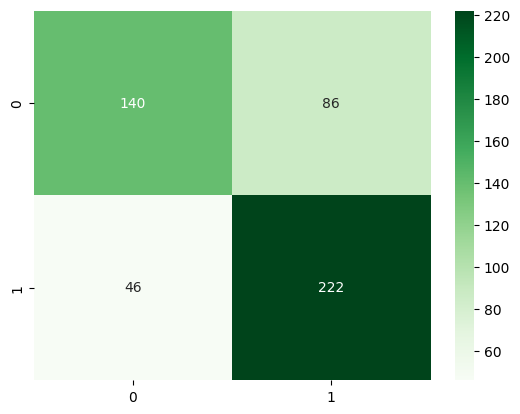

In [56]:
from sklearn import tree
# Initializing Decision Tree Classifier with max_depth=4 and max_features='sqrt'
dt = tree.DecisionTreeClassifier(max_depth=5, max_features='sqrt')

# Run the model and store the results
train_accuracy_dt, test_accuracy_dt, roc_auc_dt, tt_dt = run_model(dt)

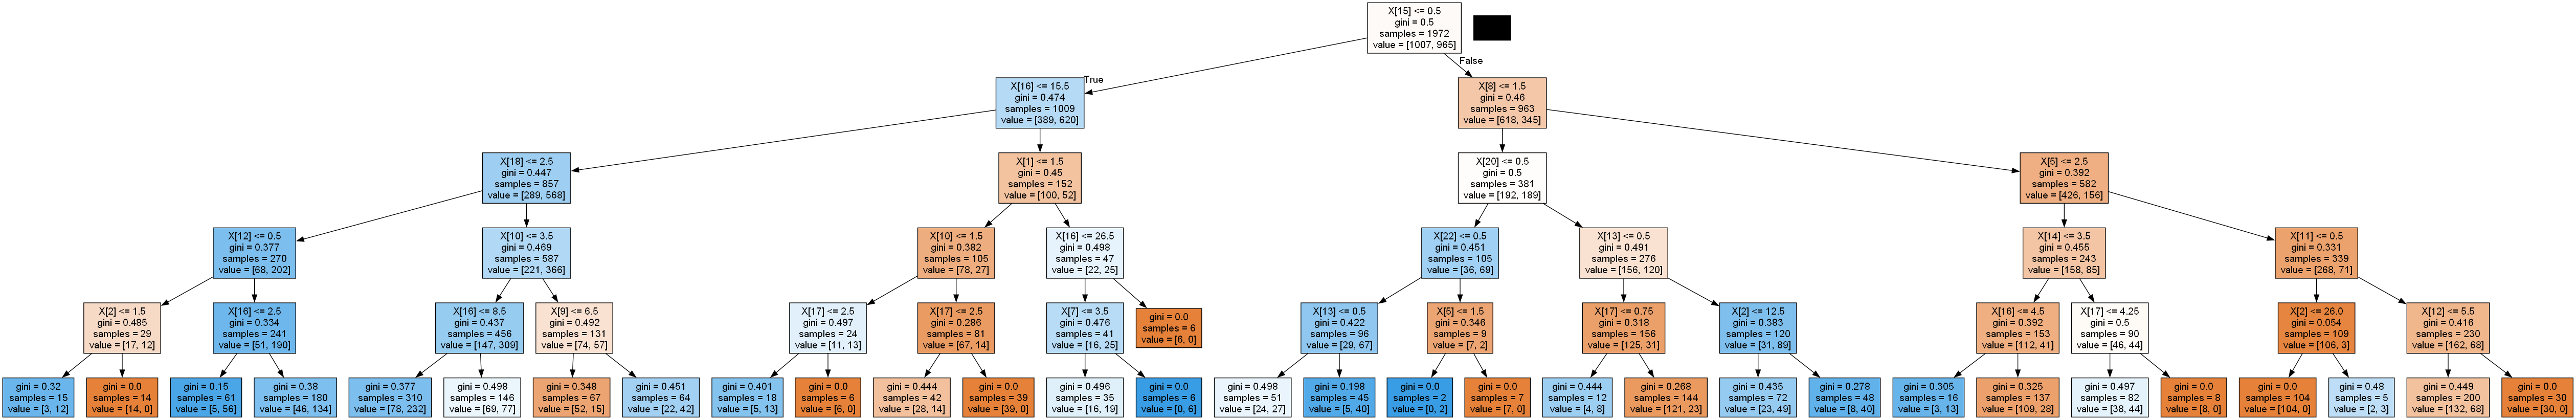

In [57]:
from IPython.display import Image
import pydotplus
# Generating DOT data for the Decision Tree
dot_data = tree.export_graphviz(dt, filled=True)

# Creating graph from the DOT data using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the Decision Tree using Image
Image(graph.create_png())

Train Accuracy = 0.8154158215010142
Test Accuracy = 0.8097165991902834
ROC Area under Curve = 0.8072909787346454
Time taken = 0.11901116371154785
              precision    recall  f1-score   support

           0    0.80000   0.77876   0.78924       226
           1    0.81752   0.83582   0.82657       268

    accuracy                        0.80972       494
   macro avg    0.80876   0.80729   0.80790       494
weighted avg    0.80950   0.80972   0.80949       494



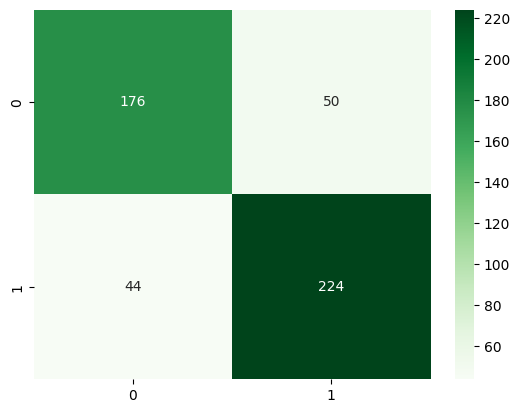

In [58]:
from sklearn import ensemble
# Defining hyperparameters for Random Forest Classifier
params = {
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initializing Random Forest Classifier with the defined hyperparameters
rf = ensemble.RandomForestClassifier(**params)

# Run the model and store the results
train_accuracy_rf, test_accuracy_rf, roc_auc_rf, tt_rf = run_model(rf)

Train Accuracy = 0.941683569979716
Test Accuracy = 0.9149797570850202
ROC Area under Curve = 0.9122804120987981
Time taken = 3.200291395187378
              precision    recall  f1-score   support

           0    0.92991   0.88053   0.90455       226
           1    0.90357   0.94403   0.92336       268

    accuracy                        0.91498       494
   macro avg    0.91674   0.91228   0.91395       494
weighted avg    0.91562   0.91498   0.91475       494

RandomForestClassifier(max_depth=7, n_estimators=200)


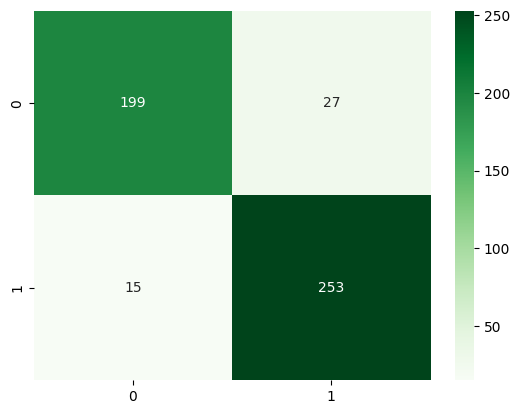

In [59]:
# Defining a dictionary of hyperparameters for Random Forest Classifier for grid search
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the Random Forest
    'max_depth': [1, 4, 5, 6, 7],             # Maximum depth of individual decision trees
    'min_samples_split': [2, 5],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5],         # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']               # Number of features to consider for the best split
}

# Initializing GridSearchCV with the Random Forest Classifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the model and store the results
train_accuracy_gs, test_accuracy_gs, roc_auc_gs, tt_gs = run_model(grid_search)

# Print the best estimator found by GridSearchCV
print(grid_search.best_estimator_)


Train Accuracy = 0.8438133874239351
Test Accuracy = 0.840080971659919
ROC Area under Curve = 0.8387432307489102
Time taken = 0.374603271484375
              precision    recall  f1-score   support

           0    0.82667   0.82301   0.82483       226
           1    0.85130   0.85448   0.85289       268

    accuracy                        0.84008       494
   macro avg    0.83898   0.83874   0.83886       494
weighted avg    0.84003   0.84008   0.84005       494



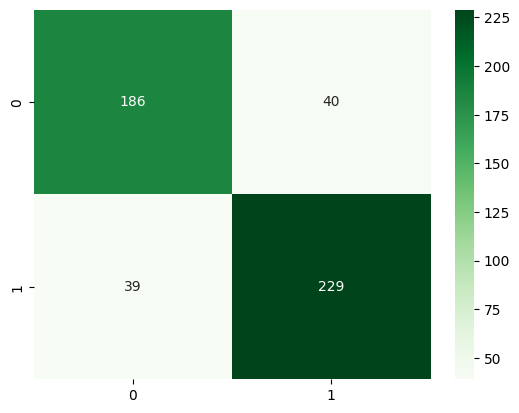

In [60]:
# Initializing Bagging Classifier with Decision Tree as the base estimator, 1000 estimators, and using bootstrap sampling
bag = ensemble.BaggingClassifier(base_estimator=dt, n_estimators=1000, bootstrap=True, n_jobs=-1)

# Run the model and store the results
train_accuracy_bag, test_accuracy_bag, roc_auc_bag, tt_bag = run_model(bag)


Train Accuracy = 0.7429006085192698
Test Accuracy = 0.7672064777327935
ROC Area under Curve = 0.7688053097345133
Time taken = 8.306384325027466
              precision    recall  f1-score   support

           0    0.72653   0.78761   0.75584       226
           1    0.80723   0.75000   0.77756       268

    accuracy                        0.76721       494
   macro avg    0.76688   0.76881   0.76670       494
weighted avg    0.77031   0.76721   0.76762       494



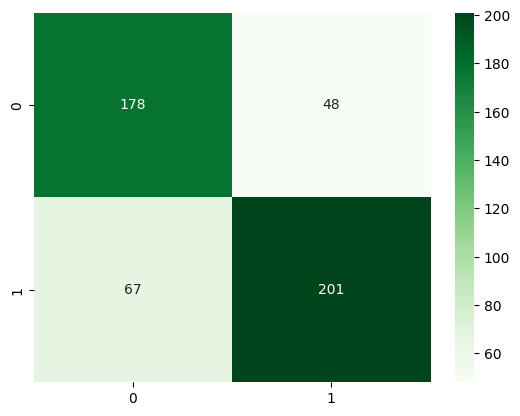

In [61]:
# Initializing AdaBoost Classifier
ada = ensemble.AdaBoostClassifier(learning_rate=0.001, n_estimators=5000)

# Run the model and store the results
train_accuracy_ada, test_accuracy_ada, roc_auc_ada, tt_ada = run_model(ada)

Train Accuracy = 0.8179513184584178
Test Accuracy = 0.8502024291497976
ROC Area under Curve = 0.8480715889578654
Time taken = 0.03485918045043945
              precision    recall  f1-score   support

           0    0.84545   0.82301   0.83408       226
           1    0.85401   0.87313   0.86347       268

    accuracy                        0.85020       494
   macro avg    0.84973   0.84807   0.84877       494
weighted avg    0.85010   0.85020   0.85002       494



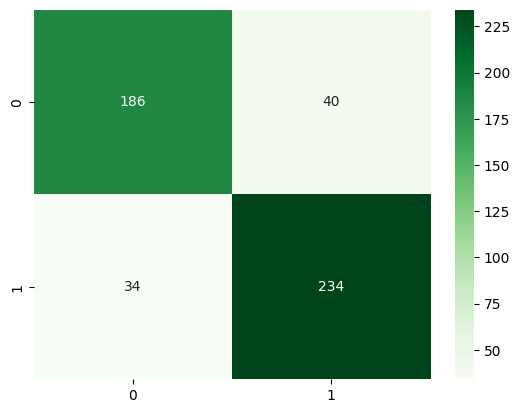

In [62]:
from xgboost import XGBClassifier
# Initializing XGBoost Classifier with 100 estimators and a maximum depth of 1
xgb = XGBClassifier(n_estimators=100, max_depth=1)

# Run the model and store the results
train_accuracy_xgb, test_accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(xgb)

Train Accuracy = 0.9579107505070994
Test Accuracy = 0.9089068825910931
ROC Area under Curve = 0.9025227843085458
Time taken = 6.427603006362915
              precision    recall  f1-score   support

           0    0.96891   0.82743   0.89260       226
           1    0.87043   0.97761   0.92091       268

    accuracy                        0.90891       494
   macro avg    0.91967   0.90252   0.90676       494
weighted avg    0.91549   0.90891   0.90796       494



c:\Users\jatin\miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


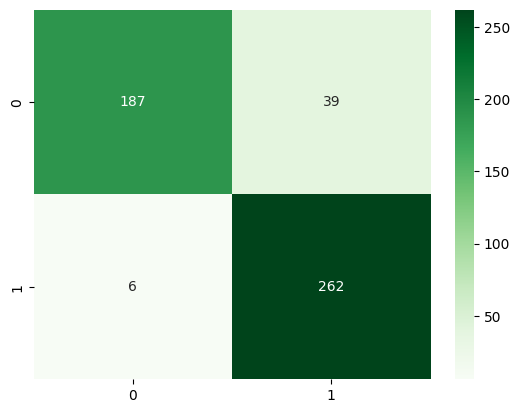

In [63]:
from sklearn.neural_network import MLPClassifier
# Defining hyperparameters for the Multi-layer Perceptron (MLP) Classifier
params = {
    'hidden_layer_sizes': (128, 64, 32),  # Number of neurons in each hidden layer
    'activation': 'logistic',              # Activation function for the hidden layers
    'solver': 'adam',                     # Optimization algorithm
    'max_iter': 300                        # Maximum number of iterations
}

# Initialize MLP Classifier with the specified hyperparameters
nn = MLPClassifier(**params)

# Run the model and store the results
train_accuracy_nn, test_accuracy_nn, roc_auc_nn, tt_nn = run_model(nn)

Train Accuracy = 0.9437119675456389
Test Accuracy = 0.9230769230769231
ROC Area under Curve = 0.9197430986659624
Time taken = 0.46813058853149414
              precision    recall  f1-score   support

           0    0.94762   0.88053   0.91284       226
           1    0.90493   0.95896   0.93116       268

    accuracy                        0.92308       494
   macro avg    0.92627   0.91974   0.92200       494
weighted avg    0.92446   0.92308   0.92278       494



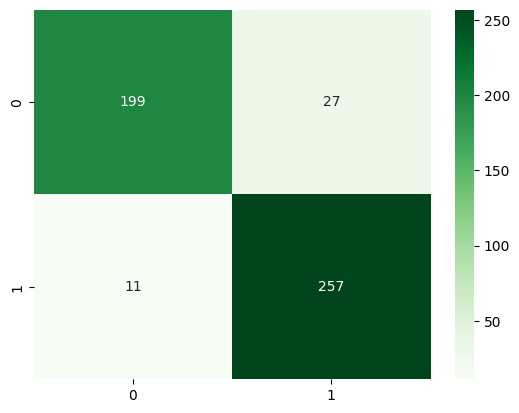

In [64]:
from sklearn.svm import SVC
# Defining hyperparameters for Support Vector Classifier
params = {
    'C': 1.0,            # Regularization parameter
    'kernel': 'rbf',     # Kernel type
    'probability': True  # Enable probability estimates
}
svm = SVC(**params)

# Run the model with scaled data and store the results
train_accuracy_svm, test_accuracy_svm, roc_auc_svm, tt_svm = run_model(svm, X_train=X_train_s, X_test=X_test_s)

Train Accuracy = 0.8118661257606491
Test Accuracy = 0.8421052631578947
ROC Area under Curve = 0.8406089023907014
Time taken = 0.027508974075317383
              precision    recall  f1-score   support

           0    0.83036   0.82301   0.82667       226
           1    0.85185   0.85821   0.85502       268

    accuracy                        0.84211       494
   macro avg    0.84110   0.84061   0.84084       494
weighted avg    0.84202   0.84211   0.84205       494



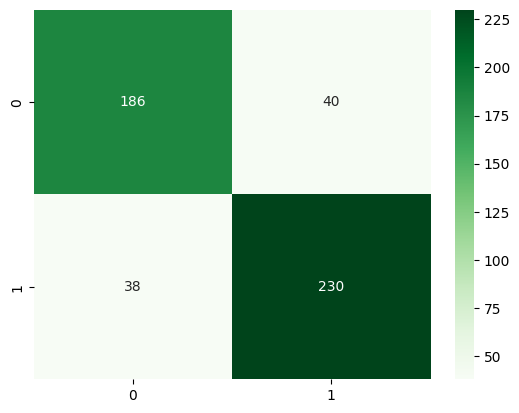

In [65]:
from lightgbm import LGBMClassifier
# Defining hyperparameters for the LightGBM Classifier
params = {
    'colsample_bytree': 0.95,       # Subsample ratio of columns when constructing each tree
    'max_depth': 1,                 # Maximum depth of tree
    'min_split_gain': 0.1,          # Minimum loss reduction required to make a further partition
    'n_estimators': 200,            # Number of boosting iterations
    'num_leaves': 50,               # Maximum number of leaves in one tree
    'reg_alpha': 1.2,               # L1 regularization term on weights
    'reg_lambda': 1.2,              # L2 regularization term on weights
    'subsample': 0.95,              # Subsample ratio of the training instance
    'subsample_freq': 20            # Frequence of subsample, <=0 means no enable
}

# Initializing LightGBM Classifier with the specified hyperparameters and turn off verbose output
lgbm = LGBMClassifier(**params, verbose=-1)

# Run the model and store the results
train_accuracy_lgbm, test_accuracy_lgbm, roc_auc_lgbm, tt_lgbm = run_model(lgbm)


Train Accuracy = 0.7358012170385395
Test Accuracy = 0.728744939271255
ROC Area under Curve = 0.7343977017567032
Time taken = 0.06782913208007812
              precision    recall  f1-score   support

           0    0.67037   0.80088   0.72984       226
           1    0.79911   0.66791   0.72764       268

    accuracy                        0.72874       494
   macro avg    0.73474   0.73440   0.72874       494
weighted avg    0.74021   0.72874   0.72865       494



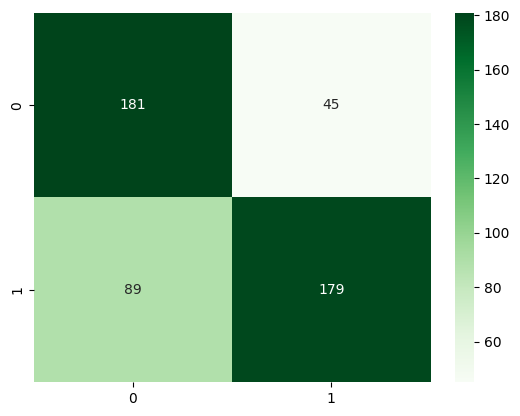

In [66]:
from catboost import CatBoostClassifier
# Initializing CatBoost Classifier with specified hyperparameters
cb = CatBoostClassifier(learning_rate=0.001, iterations=50, max_depth=4, silent=True)

# Run the model using the defined function and store the results
train_accuracy_cb, test_accuracy_cb, roc_auc_cb, tt_cb = run_model(cb)

In [67]:
# Analysis dictionary to store performance metrics for various models
analysis = {
    'LogisticRegression' : {
        'Train Accuracy': train_accuracy_lr, 
        'Test Accuracy': test_accuracy_lr, 
        'ROC AUC': roc_auc_lr, 
        'Time taken': tt_lr},
    'LinearDiscriminantAnalysis' : {
        'Train Accuracy': train_accuracy_lda, 
        'Test Accuracy': test_accuracy_lda, 
        'ROC AUC': roc_auc_lda, 
        'Time taken': tt_lda},
    'KNeighborsClassifier' : {
        'Train Accuracy': train_accuracy_knn, 
        'Test Accuracy': test_accuracy_knn, 
        'ROC AUC': roc_auc_knn, 
        'Time taken': tt_knn},
    'DecisionTreeClassifier' : {
        'Train Accuracy': train_accuracy_dt, 
        'Test Accuracy': test_accuracy_dt, 
        'ROC AUC': roc_auc_dt, 
        'Time taken': tt_dt},
    'RandomForestClassifier' : {
        'Train Accuracy': train_accuracy_rf, 
        'Test Accuracy': test_accuracy_rf, 
        'ROC AUC': roc_auc_rf, 
        'Time taken': tt_rf},
    'GridSearchCV' : {
        'Train Accuracy': train_accuracy_gs, 
        'Test Accuracy': test_accuracy_gs, 
        'ROC AUC': roc_auc_gs, 
        'Time taken': tt_gs},
    'BaggingClassifier' : {
        'Train Accuracy': train_accuracy_bag, 
        'Test Accuracy': test_accuracy_bag, 
        'ROC AUC': roc_auc_bag, 
        'Time taken': tt_bag},
    'AdaBoostClassifier' : {
        'Train Accuracy': train_accuracy_ada, 
        'Test Accuracy': test_accuracy_ada, 
        'ROC AUC': roc_auc_ada, 
        'Time taken': tt_ada},
    'XGBClassifier' : {
        'Train Accuracy': train_accuracy_xgb, 
        'Test Accuracy': test_accuracy_xgb, 
        'ROC AUC': roc_auc_xgb, 
        'Time taken': tt_xgb},
    'MLPClassifier' : {
        'Train Accuracy': train_accuracy_nn, 
        'Test Accuracy': test_accuracy_nn, 
        'ROC AUC': roc_auc_nn, 
        'Time taken': tt_nn},
    'SVC' : {
        'Train Accuracy': train_accuracy_svm, 
        'Test Accuracy': test_accuracy_svm, 
        'ROC AUC': roc_auc_svm, 
        'Time taken': tt_svm},
    'LGBMClassifier' : {
        'Train Accuracy': train_accuracy_lgbm, 
        'Test Accuracy': test_accuracy_lgbm, 
        'ROC AUC': roc_auc_lgbm, 
        'Time taken': tt_lgbm},
    'CatBoostClassifier' : {
        'Train Accuracy': train_accuracy_cb, 
        'Test Accuracy': test_accuracy_cb, 
        'ROC AUC': roc_auc_cb, 
        'Time taken': tt_cb}
}

analysis_df = pd.DataFrame(data=analysis)
analysis_df = analysis_df.transpose()

# Display the DataFrame
analysis_df

,Train Accuracy,Test Accuracy,ROC AUC,Time taken
LogisticRegression,0.760649,0.793522,0.792366,0.024001
LinearDiscriminantAnalysis,0.754564,0.789474,0.788634,0.009509
KNeighborsClassifier,0.794118,0.801619,0.803295,0.102006
DecisionTreeClassifier,0.746957,0.732794,0.723914,0.004322
RandomForestClassifier,0.815416,0.809717,0.807291,0.119011
GridSearchCV,0.941684,0.914980,0.912280,3.200291
BaggingClassifier,0.843813,0.840081,0.838743,0.374603
AdaBoostClassifier,0.742901,0.767206,0.768805,8.306384
XGBClassifier,0.817951,0.850202,0.848072,0.034859
MLPClassifier,0.957911,0.908907,0.902523,6.427603


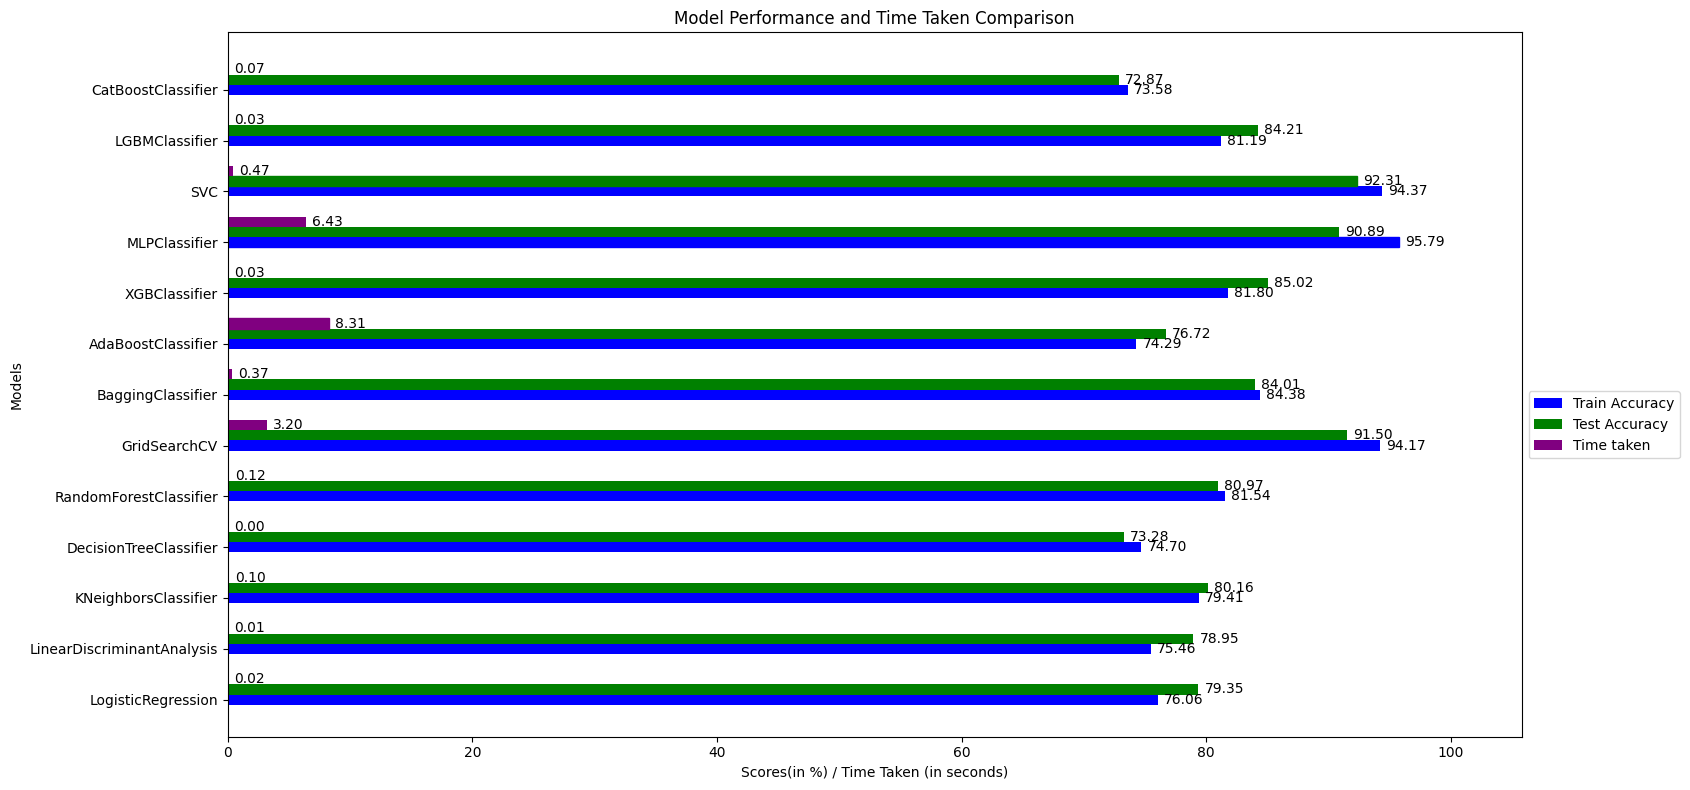

In [68]:
# Extract model names, train accuracies, test accuracies, and time taken from the analysis dataframe
models = analysis_df.index
train_accuracies = analysis_df['Train Accuracy'] * 100
test_accuracies = analysis_df['Test Accuracy'] * 100
time_taken = analysis_df['Time taken']  # Corrected column name

# Find maximum values for scaling
max_train_accuracy = train_accuracies.max()
max_test_accuracy = test_accuracies.max()
max_time = time_taken.max()

# Set up the plot
fig, ax = plt.subplots(figsize=(17, 8))

# Define bar width and create an array of indices for the models
bar_width = 0.2
indices = np.arange(len(train_accuracies))

# Define colors and labels for the bar plot
colors = ['blue', 'green', 'purple']
labels = ['Train Accuracy', 'Test Accuracy', 'Time taken']

# Plot bars for train accuracy, test accuracy, and time taken
for i, (data, label) in enumerate(zip([train_accuracies, test_accuracies, time_taken], labels)):
    bars = ax.barh(indices + i * bar_width, data, bar_width, label=label, color=colors[i])
    
    # Highlight the bar with maximum value
    max_index = np.argmax(data)
    bars[max_index].set_color(colors[i])

    # Add data labels to the bars
    for idx, bar in enumerate(bars):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{data[idx]:.2f}', 
                va='center', ha='left')

# Customize the plot
ax.set_xlabel('Scores(in %) / Time Taken (in seconds)')
ax.set_ylabel('Models')
ax.set_title('Model Performance and Time Taken Comparison')
ax.set_yticks(indices)
ax.set_yticklabels(train_accuracies.index)  # Assuming 'Train Accuracy' column contains model names
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
ax.set_xlim(0, max_train_accuracy + 10)  # Adjust x-axis limit

plt.tight_layout()
plt.show()


### Got Best Result by SVM with accuracy score of Training `0.9437` and Testing `0.9230` and time tooked for training was `0.17s`. So the best model is `SVM`.